In [2]:
import sys
sys.path.insert(0, '..')

from multipliers import NaiveMultiplier, RSRBinaryMultiplier, RSRTernaryMultiplier

import random
import time
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def generate_random_binary_matrix(n):
    # Generate a random binary matrix of size n x n
    binary_matrix = np.random.randint(2, size=(n, n))
    return binary_matrix

def generate_random_ternary_matrix(n):
    ternary_matrix = np.random.randint(low=-1, high=2, size=(n, n))
    return ternary_matrix

def generate_random_int_vector(size, low=0, high=100):
    random_vector = np.random.randint(low, high, size)
    return random_vector

In [3]:
n_s = [2**i for i in range(11, 16)]

In [4]:
vectors = [generate_random_int_vector(n) for n in n_s]
binary_matrices = [generate_random_binary_matrix(n) for n in n_s]
ternary_matrices = [generate_random_ternary_matrix(n) for n in n_s]

In [5]:
naive_times = []
rsr_times = []

for v, A in zip(vectors, binary_matrices):
    naive = NaiveMultiplier(A)
    rsr = RSRBinaryMultiplier(A)
    
    naive_time = %timeit -o naive.multiply(v) 
    naive_times.append(naive_time.best) 
    
    rsr_time = %timeit -o rsr.multiply(v)  
    rsr_times.append(rsr_time.best)  

naive_times = np.array(naive_times)
rsr_times = np.array(rsr_times)

for length, naive_time, rsr_time in zip([len(v) for v in vectors], naive_times, rsr_times):
    print(f"Vector length: {length} | Naive time: {naive_time:.6f} seconds | RSR time: {rsr_time:.6f} seconds")


34.9 ms ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
24 ms ± 131 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
183 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
77 ms ± 280 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
918 ms ± 567 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)
269 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.86 s ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
962 ms ± 5.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
22.4 s ± 5.05 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.39 s ± 5.93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Vector length: 2048 | Naive time: 0.032812 seconds | RSR time: 0.023894 seconds
Vector length: 4096 | Naive time: 0.181756 seconds | RSR time: 0.076645 seconds
Vector length: 8192 | Naive time: 0.917374 seconds | RSR time: 0.267688 seconds
Vector length: 16384 | Naive time: 4.861608 seconds | RSR time: 0.952317 seco

In [6]:

vector_lengths = np.array([len(v) for v in vectors])  # Length of each vector

speedup = naive_times / rsr_times


# Assuming vector_lengths, naive_times, and rsr_times are defined from the previous code
# Convert data to a DataFrame
data = {
    'Vector Length': vector_lengths,
    'Naive Time (s)': naive_times,
    'RSR Time (s)': rsr_times,
    'Speedup (RSR/Naive)': naive_times / rsr_times
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
output_file = 'multiplication_times_binary.csv'
df.to_csv(output_file, index=False)

print(f"Execution times saved to {output_file}")


Execution times saved to multiplication_times_binary.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


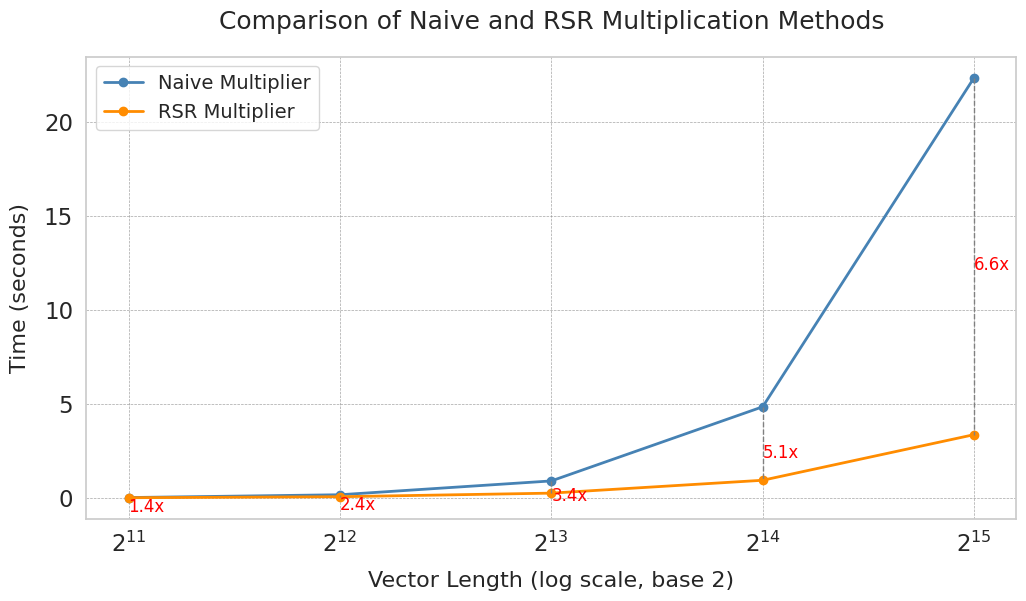

In [10]:
naive_times_ternary = []
rsr_times_ternary = []

for v, A in zip(vectors, ternary_matrices):
    naive = NaiveMultiplier(A)
    rsr = RSRTernaryMultiplier(A)
    
    naive_time = %timeit -o naive.multiply(v) 
    naive_times_ternary.append(naive_time.best) 
    
    rsr_time = %timeit -o rsr.multiply(v)  
    rsr_times_ternary.append(rsr_time.best)  

naive_times_ternary = np.array(naive_times_ternary)
rsr_times_ternary = np.array(rsr_times_ternary)

for length, naive_time, rsr_time in zip([len(v) for v in vectors], naive_times_ternary, rsr_times_ternary):
    print(f"Vector length: {length} | Naive time: {naive_time:.6f} seconds | RSR time: {rsr_time:.6f} seconds")

33.8 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
48.9 ms ± 294 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
184 ms ± 1.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
155 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
905 ms ± 417 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)
534 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.87 s ± 2.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.9 s ± 10.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
20.5 s ± 6.52 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.89 s ± 119 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Vector length: 2048 | Naive time: 0.032730 seconds | RSR time: 0.048416 seconds
Vector length: 4096 | Naive time: 0.181736 seconds | RSR time: 0.154090 seconds
Vector length: 8192 | Naive time: 0.904982 seconds | RSR time: 0.532441 seconds
Vector length: 16384 | Naive time: 4.864633 seconds | RSR time: 1.881519 s

In [13]:
rsr_times_ternary

array([0.04841599, 0.15408955, 0.532441  , 1.88151874, 6.7612758 ])

In [14]:

vector_lengths = np.array([len(v) for v in vectors])  # Length of each vector

speedup_ternary = naive_times_ternary / rsr_times_ternary


# Assuming vector_lengths, naive_times, and rsr_times are defined from the previous code
# Convert data to a DataFrame
data = {
    'Vector Length': vector_lengths,
    'Naive Time (s)': naive_times_ternary,
    'RSR Time (s)': rsr_times_ternary,
    'Speedup (RSR/Naive)': naive_times_ternary / rsr_times_ternary
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
output_file = 'multiplication_times_ternary.csv'
df.to_csv(output_file, index=False)

print(f"Execution times saved to {output_file}")


Execution times saved to multiplication_times_ternary.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


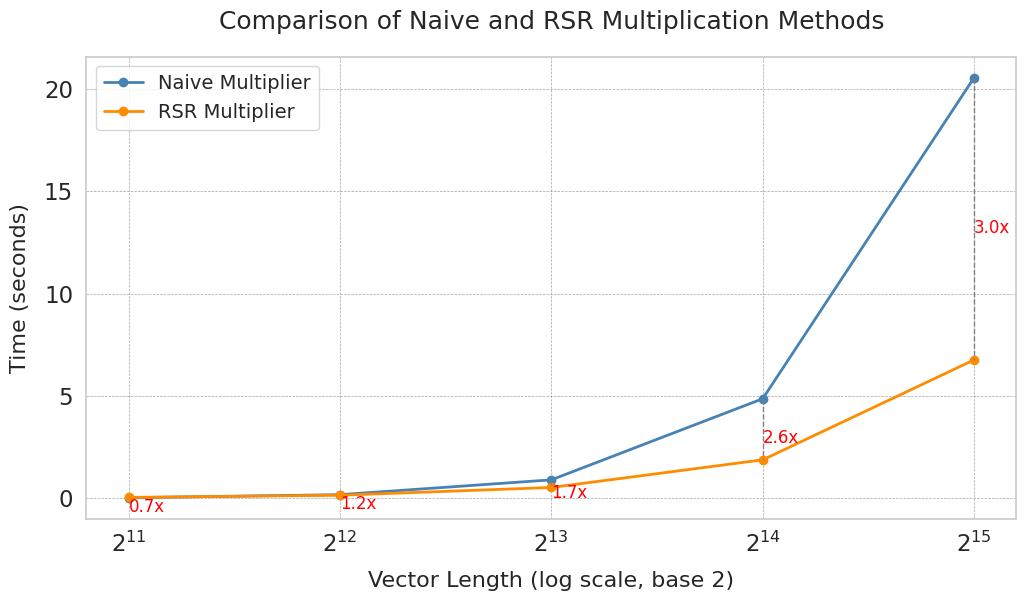

In [16]:


# Set Seaborn style and scaling
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

# Example data (replace these with actual measurements)
vector_lengths = np.array([len(v) for v in vectors])  # Length of each vector

# Create the plot with improved aesthetics
plt.figure(figsize=(12, 6))

# Plot times for NaiveMultiplier and RSRMultiplier
plt.plot(vector_lengths, naive_times_ternary, label='Naive Multiplier', marker='o', color='steelblue', markersize=6, linewidth=2)
plt.plot(vector_lengths, rsr_times_ternary, label='RSR Multiplier', marker='o', color='darkorange', markersize=6, linewidth=2)

# Draw lines connecting Naive and RSR times for each vector length to show speedup visually
for i in range(len(vector_lengths)):
    plt.plot([vector_lengths[i], vector_lengths[i]], [naive_times_ternary[i], rsr_times_ternary[i]], 
             color='gray', linestyle='--', linewidth=1)

# Label the points with the speedup factor
for i, length in enumerate(vector_lengths):
    plt.text(length, (naive_times_ternary[i] + rsr_times_ternary[i]) / 2, f"{speedup_ternary[i]:.1f}x",
             ha='left', va="top", color='red', fontsize=12)

# Configure the plot aesthetics
plt.xscale('log', base=2)
plt.xlabel('Vector Length (log scale, base 2)', fontsize=16, labelpad=10)
plt.ylabel('Time (seconds)', fontsize=16, labelpad=10)
plt.title('Comparison of Naive and RSR Multiplication Methods', fontsize=18, pad=20)
plt.legend(fontsize=14)

# Configure x-axis ticks for log base 2 and a clean grid
plt.gca().xaxis.set_major_locator(LogLocator(base=2))
plt.grid(True, which="both", ls="--", lw=0.5, color='gray', alpha=0.7)

# Save as EPS and display
plt.savefig("ternary.eps", format='eps', bbox_inches='tight')
plt.show()
